In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import matplotlib.gridspec as gridspec

# torch.cuda.is_available()
# device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
#torch.cuda.set_device(device)
# torch.set_default_device(device)
device="cpu"

## Load results

In [169]:
true_counts = torch.load("../images/setting1_true_counts.pt").to(device)
true_fluxes = torch.load("../images/setting1_true_fluxes.pt").to(device)
true_locs = torch.load("../images/setting1_true_locs.pt").to(device)
true_total_intensities = torch.load("../images/setting1_true_total_intensities.pt").to(device)
images = torch.load("../images/setting1_images.pt").to(device)
true_total_observed_flux = (images - 19200).sum([1,2])

N0 = 10000
kernel_num_iters = [5, 25, 50, 100, 200]
catalogs_per_block = [N0 // k for k in kernel_num_iters]
setting1_std_posterior_mean_count = torch.load("./setting1_std_posterior_mean_count.pt", map_location=torch.device('cpu')).to(device)
setting1_std_posterior_mean_total_flux = torch.load("./setting1_std_posterior_mean_total_flux.pt", map_location=torch.device('cpu')).to(device)
setting1_std_log_normalizing_constant = torch.load("./setting1_std_log_normalizing_constant.pt", map_location=torch.device('cpu')).to(device)
setting1_std_runtime = torch.load("./setting1_std_runtime.pt", map_location=torch.device('cpu')).to(device)
setting1_std_num_iters = torch.load("./setting1_std_num_iters.pt", map_location=torch.device('cpu')).to(device)

wastefree_M = [25, 50, 80, 125, 200]
setting1_wf_posterior_mean_count = torch.load("./setting1_wf_posterior_mean_count.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_posterior_mean_total_flux = torch.load("./setting1_wf_posterior_mean_total_flux.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_log_normalizing_constant = torch.load("./setting1_wf_log_normalizing_constant.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_runtime = torch.load("./setting1_wf_runtime.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_num_iters = torch.load("./setting1_wf_num_iters.pt", map_location=torch.device('cpu')).to(device)

## Posterior mean source count

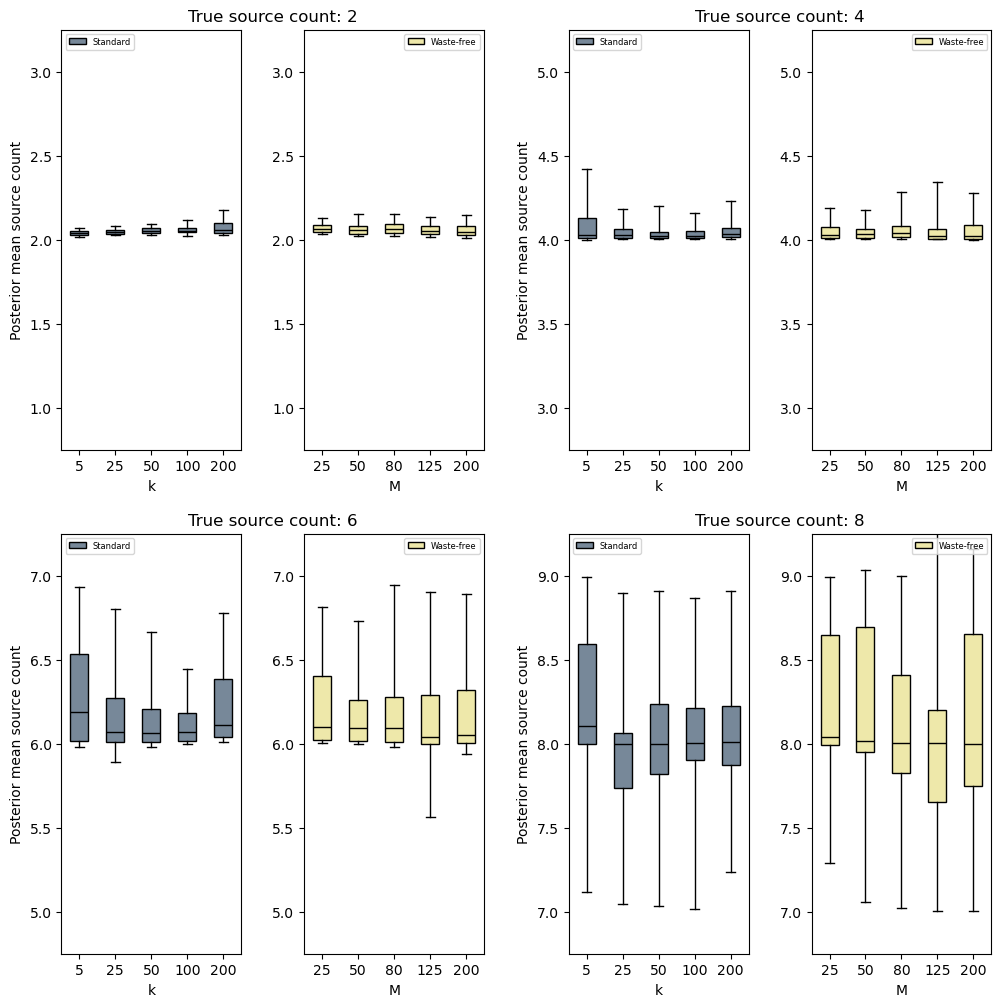

In [170]:
fig = plt.figure(figsize=(12, 12))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

y_min = torch.min(torch.stack((torch.min(torch.min(setting1_std_posterior_mean_count, dim = 1)[0], dim = 1)[0], 
torch.min(torch.min(setting1_wf_posterior_mean_count, dim = 1)[0], dim = 1)[0])), 0)[0]

y_max = torch.max(torch.stack((torch.max(torch.max(setting1_std_posterior_mean_count, dim = 1)[0], dim = 1)[0], 
torch.max(torch.max(setting1_wf_posterior_mean_count, dim = 1)[0], dim = 1)[0])), 0)[0]


for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.35, hspace=0.35)
    
        # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("True source count: {}".format((i+1)*2))
    ax.axis('off')
    fig.add_subplot(ax)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if (j == 0): 
            posterior_mean_count_img_i = setting1_std_posterior_mean_count[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False) 
        else:
            posterior_mean_count_img_i = setting1_wf_posterior_mean_count[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(5,95),
                               vert=True,
                               patch_artist=True,
                               labels=wastefree_M, showfliers=False)  
        
        if (j == 0):
            ax.set_xlabel('k')
            ax.set_ylabel('Posterior mean source count')
            for patch in bplot['boxes']:
                patch.set_facecolor('lightslategray')
            ax.legend(bplot["boxes"], ['Standard'], loc='upper left', fontsize = 6)
            
        else:
            ax.set_xlabel("M")
            for patch in bplot['boxes']:
                patch.set_facecolor('palegoldenrod')
            ax.legend(bplot["boxes"], ['Waste-free'], loc='upper right', fontsize = 6)

        for median in bplot['medians']:
            median.set_color('black')
            
        ax.set_ylim(true_counts[i]-1.25, true_counts[i]+1.25)
        # t.set_ha('center')
        fig.add_subplot(ax)

# fig.savefig('../setting1_plots/posterior_mean_count_plot.png')


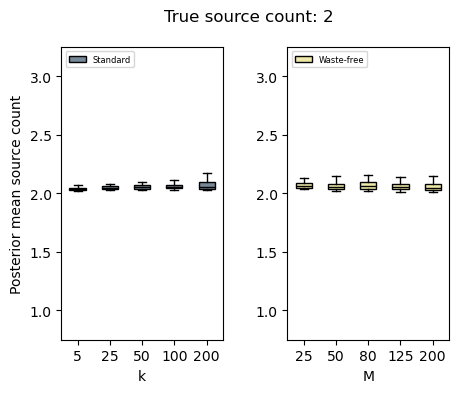

In [171]:
#PLOTS FOR SLIDES 
y_pad = 1.25
fig1a, [fig1aa, fig1ab] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig1aa.boxplot(setting1_std_posterior_mean_count[0],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig1aa.set_xlabel('k')
fig1aa.set_ylabel('Posterior mean source count')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

fig1aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig1aa.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig1ab.boxplot(setting1_wf_posterior_mean_count[0],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig1ab.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig1ab.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        
fig1aa.set_ylim(true_counts[0]-y_pad, true_counts[0]+y_pad)
fig1ab.set_ylim(true_counts[0]-y_pad, true_counts[0]+y_pad)
        
fig1a.suptitle("True source count: {}".format(2))


fig1a.savefig('../setting1_plots/setting1_fig1a.png', dpi = 400)


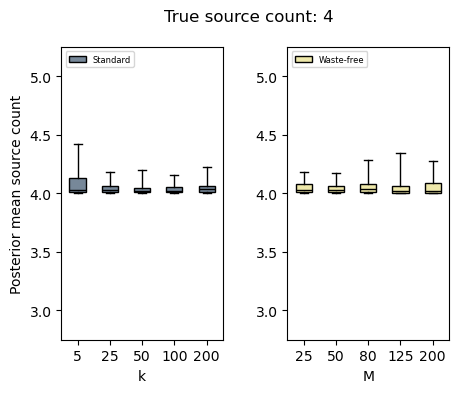

In [172]:
fig1b, [fig1ba, fig1bb] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig1ba.boxplot(setting1_std_posterior_mean_count[1],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig1ba.set_xlabel('k')
fig1ba.set_ylabel('Posterior mean source count')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')
    
    
fig1ba.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig1bb.boxplot(setting1_wf_posterior_mean_count[1],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig1bb.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
    
fig1bb.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')

i = 1
fig1ba.set_ylim(true_counts[i] - y_pad, true_counts[i] + y_pad)
fig1bb.set_ylim(true_counts[i] - y_pad, true_counts[i] + y_pad)
        
fig1b.suptitle("True source count: {}".format(4))


fig1b.savefig('../setting1_plots/setting1_fig1b.png', dpi = 400)

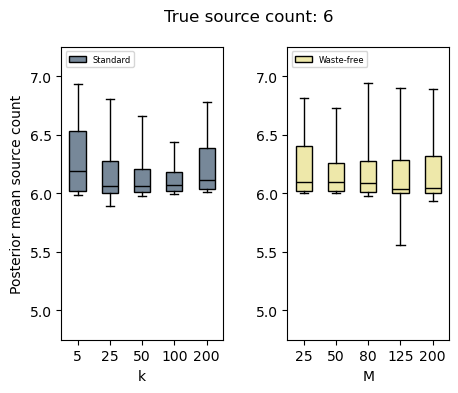

In [173]:
fig1c, [fig1ca, fig1cb] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig1ca.boxplot(setting1_std_posterior_mean_count[2],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig1ca.set_xlabel('k')
fig1ca.set_ylabel('Posterior mean source count')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')
    
    
fig1ca.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig1cb.boxplot(setting1_wf_posterior_mean_count[2],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig1cb.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
    
fig1cb.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        
i = 2
fig1ca.set_ylim(true_counts[2] - y_pad, true_counts[2] + y_pad)
fig1cb.set_ylim(true_counts[2] - y_pad, true_counts[2] + y_pad)
        
fig1c.suptitle("True source count: {}".format(6))


fig1c.savefig('../setting1_plots/setting1_fig1c.png', dpi = 400)

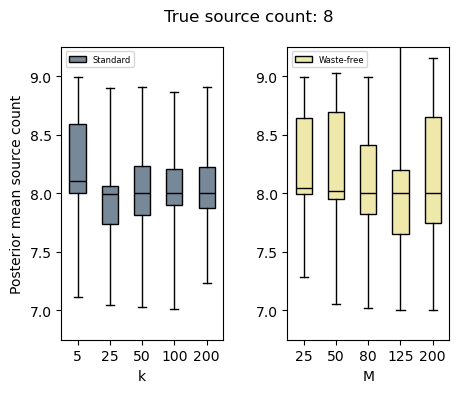

In [174]:
fig1d, [fig1da, fig1db] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig1da.boxplot(setting1_std_posterior_mean_count[3],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig1da.set_xlabel('k')
fig1da.set_ylabel('Posterior mean source count')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')
    
    
fig1da.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig1db.boxplot(setting1_wf_posterior_mean_count[3],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig1db.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
    
fig1db.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        

fig1da.set_ylim(true_counts[3] - y_pad, true_counts[3] + y_pad)
fig1db.set_ylim(true_counts[3] - y_pad, true_counts[3] + y_pad)
        
fig1d.suptitle("True source count: {}".format(8))


fig1d.savefig('../setting1_plots/setting1_fig1d.png', dpi = 400)

## Posterior mean total flux

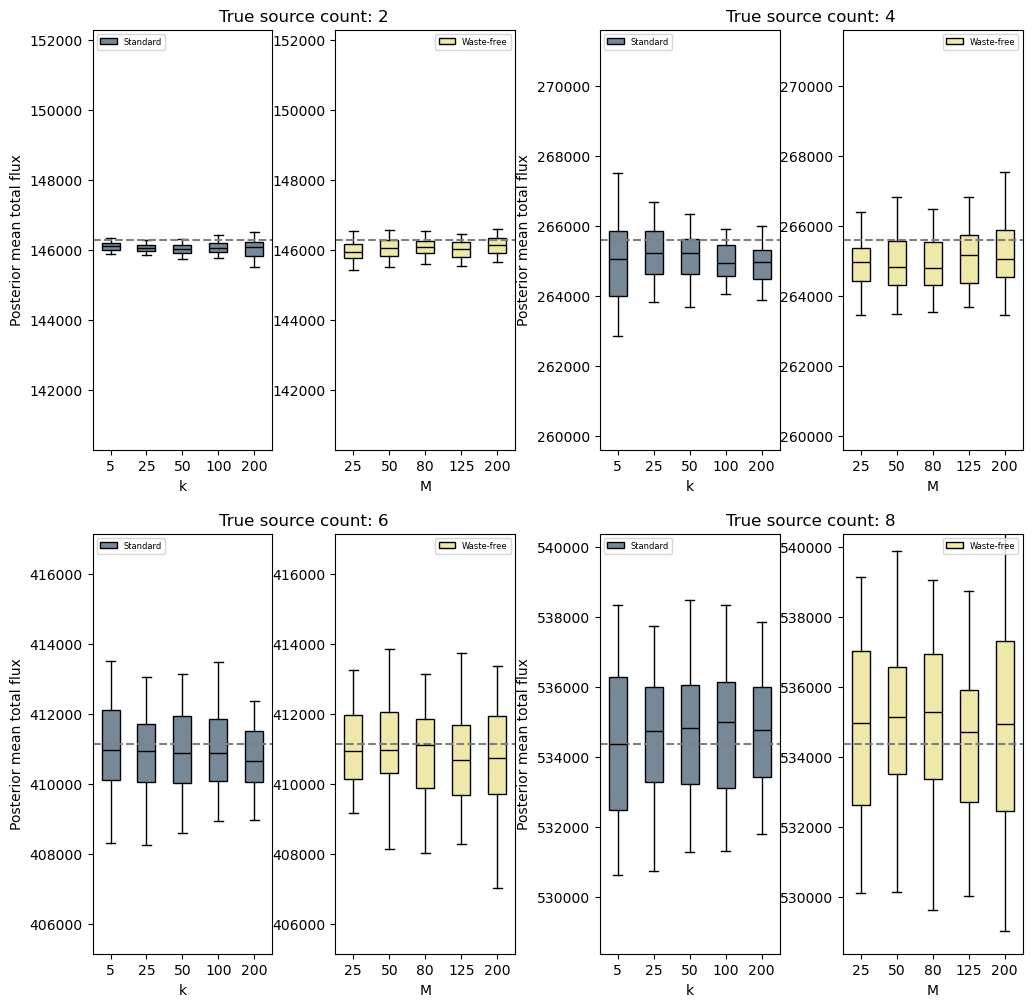

In [175]:
fig = plt.figure(figsize=(12, 12))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

#there has got to be a better way to do this 
y_min = torch.min(torch.stack((torch.min(torch.min(setting1_std_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0], 
torch.min(torch.min(setting1_wf_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0])), 0)[0]

y_max = torch.max(torch.stack((torch.max(torch.max(setting1_std_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0], 
torch.max(torch.max(setting1_wf_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0])), 0)[0]

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.35, hspace=0.35)
    
        # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("True source count: {}".format((i+1)*2))
    ax.axis('off')
    fig.add_subplot(ax, sharey = True)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if (j == 0): 
            posterior_mean_count_img_i = setting1_std_posterior_mean_total_flux[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)  
        else:
            posterior_mean_count_img_i = setting1_wf_posterior_mean_total_flux[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)  
        
        if (j == 0):
            ax.set_xlabel('k')
            ax.set_ylabel('Posterior mean total flux')
            for patch in bplot['boxes']:
                patch.set_facecolor('lightslategray')
            ax.legend(bplot["boxes"], ['Standard'], loc='upper left', fontsize = 6)
            
        else:
            ax.set_xlabel("M")
            for patch in bplot['boxes']:
                patch.set_facecolor('palegoldenrod')
            ax.legend(bplot["boxes"], ['Waste-free'], loc='upper right', fontsize = 6)

        for median in bplot['medians']:
            median.set_color('black')
        
        #ax.set_ylim(y_min[i]-100, y_max[i]+100)
        ax.set_ylim((images - 19200.).sum([1,2])[i] - 6000, (images - 19200.).sum([1,2])[i] + 6000)
        
        left, right = ax.get_xlim()
        ax.hlines((images - 19200.).sum([1,2])[i], xmin=left, xmax=right, color='gray', linestyles='--')
        # t.set_ha('center')
        fig.add_subplot(ax)

# fig.savefig('../setting1_plots/posterior_mean_total_flux_plot.png')

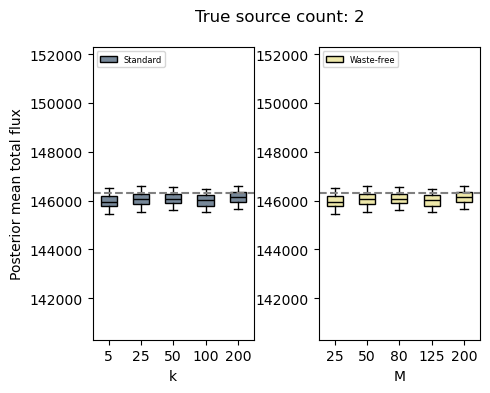

In [176]:
#PLOTS FOR SLIDES  

fig2a, [fig2aa, fig2ab] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig2aa.boxplot(setting1_wf_posterior_mean_total_flux[0],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig2aa.set_xlabel('k')
fig2aa.set_ylabel('Posterior mean total flux')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig2aa.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig2ab.boxplot(setting1_wf_posterior_mean_total_flux[0],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig2ab.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig2ab.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        
fig2aa.set_ylim((images - 19200.).sum([1,2])[0] - 6000, (images - 19200.).sum([1,2])[0] + 6000)
fig2ab.set_ylim((images - 19200.).sum([1,2])[0] - 6000, (images - 19200.).sum([1,2])[0] + 6000)

left, right = fig2aa.get_xlim()
fig2aa.hlines((images - 19200.).sum([1,2])[0], xmin=left, xmax=right, color='gray', linestyles='--')
fig2ab.hlines((images - 19200.).sum([1,2])[0], xmin=left, xmax=right, color='gray', linestyles='--')
        
fig2a.suptitle("True source count: {}".format(2))


fig2a.savefig('../setting1_plots/setting1_fig2a.png', dpi = 400)

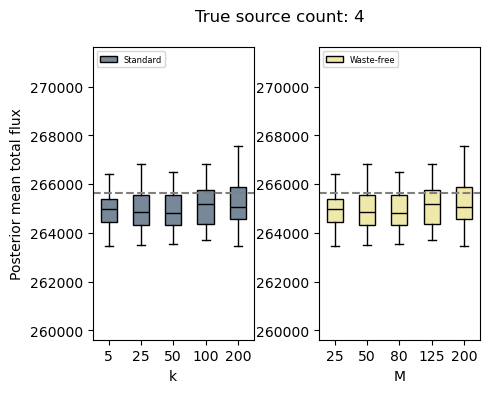

In [177]:
fig2b, [fig2ba, fig2bb] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig2ba.boxplot(setting1_wf_posterior_mean_total_flux[1],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig2ba.set_xlabel('k')
fig2ba.set_ylabel('Posterior mean total flux')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig2ba.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig2bb.boxplot(setting1_wf_posterior_mean_total_flux[1],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig2bb.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig2bb.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        
fig2ba.set_ylim((images - 19200.).sum([1,2])[1] - 6000, (images - 19200.).sum([1,2])[1] + 6000)
fig2bb.set_ylim((images - 19200.).sum([1,2])[1] - 6000, (images - 19200.).sum([1,2])[1] + 6000)

left, right = fig2ba.get_xlim()
fig2ba.hlines((images - 19200.).sum([1,2])[1], xmin=left, xmax=right, color='gray', linestyles='--')
fig2bb.hlines((images - 19200.).sum([1,2])[1], xmin=left, xmax=right, color='gray', linestyles='--')
        
fig2b.suptitle("True source count: {}".format(4))


fig2b.savefig('../setting1_plots/setting1_fig2b.png', dpi = 400)

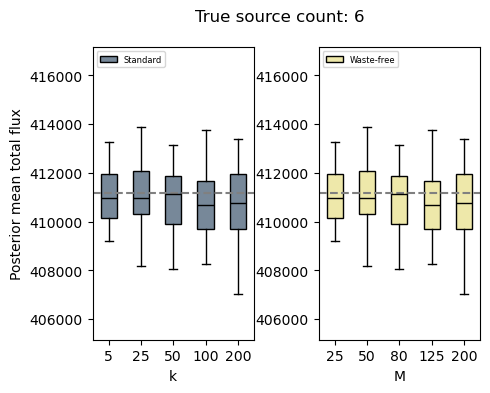

In [178]:
fig2c, [fig2ca, fig2cb] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig2ca.boxplot(setting1_wf_posterior_mean_total_flux[2],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig2ca.set_xlabel('k')
fig2ca.set_ylabel('Posterior mean total flux')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig2ca.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig2cb.boxplot(setting1_wf_posterior_mean_total_flux[2],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig2cb.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig2cb.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        
fig2ca.set_ylim((images - 19200.).sum([1,2])[2] - 6000, (images - 19200.).sum([1,2])[2] + 6000)
fig2cb.set_ylim((images - 19200.).sum([1,2])[2] - 6000, (images - 19200.).sum([1,2])[2] + 6000)

left, right = fig2ca.get_xlim()
fig2ca.hlines((images - 19200.).sum([1,2])[2], xmin=left, xmax=right, color='gray', linestyles='--')
fig2cb.hlines((images - 19200.).sum([1,2])[2], xmin=left, xmax=right, color='gray', linestyles='--')
        
fig2c.suptitle("True source count: {}".format(6))


fig2c.savefig('../setting1_plots/setting1_fig2c.png', dpi = 400)

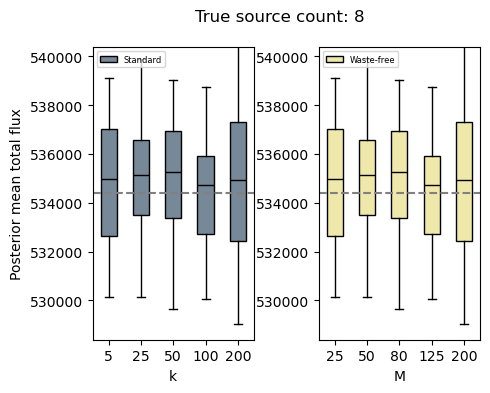

In [179]:
fig2d, [fig2da, fig2db] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig2da.boxplot(setting1_wf_posterior_mean_total_flux[3],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig2da.set_xlabel('k')
fig2da.set_ylabel('Posterior mean total flux')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig2da.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig2db.boxplot(setting1_wf_posterior_mean_total_flux[3],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig2db.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig2db.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
        
#fig2da.set_ylim(y_min[3]-100, y_max[3]+100)
#fig2db.set_ylim(y_min[3]-100, y_max[3]+100)

fig2da.set_ylim((images - 19200.).sum([1,2])[3] - 6000, (images - 19200.).sum([1,2])[3] + 6000)
fig2db.set_ylim((images - 19200.).sum([1,2])[3] - 6000, (images - 19200.).sum([1,2])[3] + 6000)



left, right = fig2aa.get_xlim()
fig2da.hlines((images - 19200.).sum([1,2])[3], xmin=left, xmax=right, color='gray', linestyles='--')
fig2db.hlines((images - 19200.).sum([1,2])[3], xmin=left, xmax=right, color='gray', linestyles='--')
        
fig2d.suptitle("True source count: {}".format(8))


fig2d.savefig('../setting1_plots/setting1_fig2d.png', dpi = 400)

In [180]:
setting1_wf_posterior_mean_total_flux.quantile(0.05, 2)
setting1_wf_posterior_mean_total_flux.quantile(0.95, 2)

tensor([[146534.3750, 146586.2812, 146543.8906, 146468.2344, 146606.1250],
        [266396.8750, 266835.6250, 266503.8125, 266836.0625, 267550.0625],
        [413272.4688, 413877.9375, 413160.4062, 413757.1562, 413371.5312],
        [539140.3125, 539884.8125, 539049.0000, 538767.1250, 540436.6250]])

## Estimated log normalizing constant

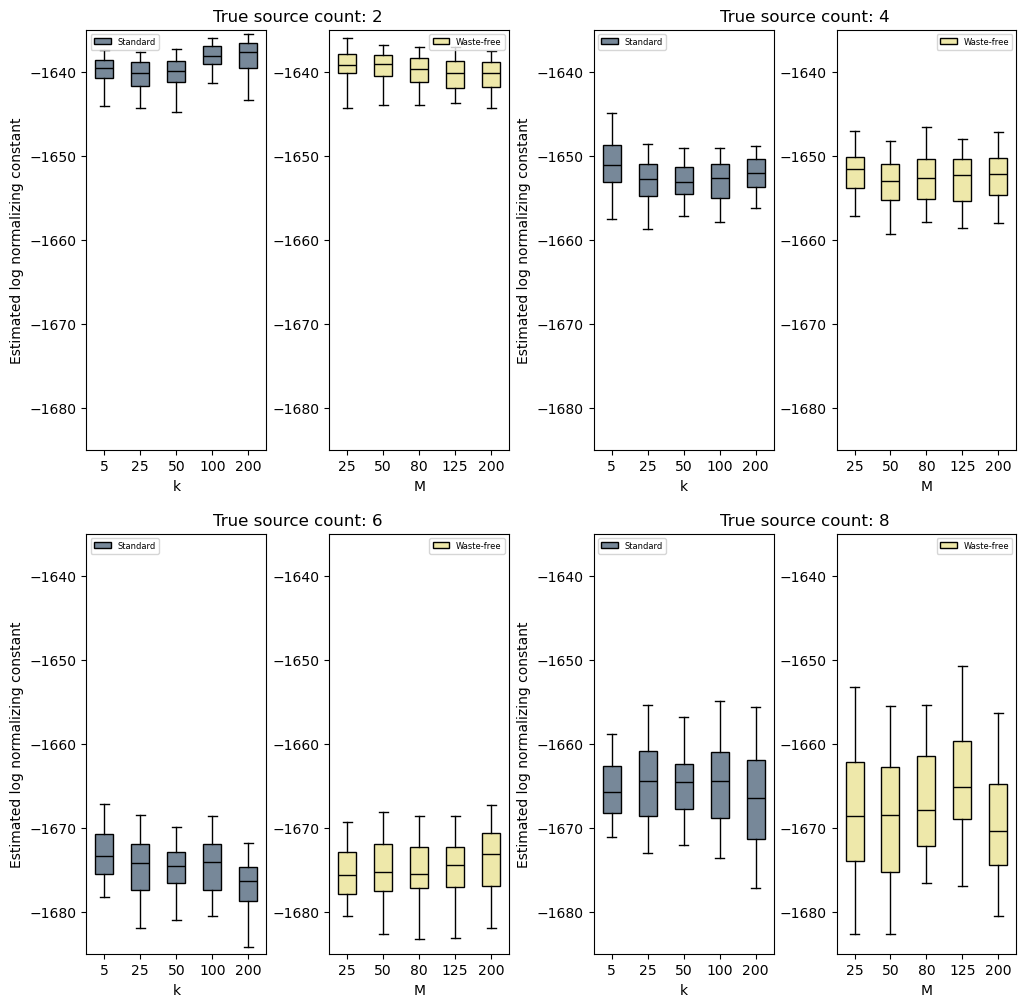

In [181]:
fig = plt.figure(figsize=(12, 12))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

#there has got to be a better way to do this 
# y_min = torch.min(torch.stack((torch.min(torch.min(setting1_std_log_normalizing_constant, dim = 1)[0], dim = 1)[0], 
# torch.min(torch.min(setting1_wf_log_normalizing_constant, dim = 1)[0], dim = 1)[0])), 0)[0]

# y_max = torch.max(torch.stack((torch.max(torch.max(setting1_std_log_normalizing_constant, dim = 1)[0], dim = 1)[0], 
# torch.max(torch.max(setting1_wf_log_normalizing_constant, dim = 1)[0], dim = 1)[0])), 0)[0]

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.35, hspace=0.35)
    
        # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("True source count: {}".format((i+1)*2))
    ax.axis('off')
    fig.add_subplot(ax, sharey = True)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if (j == 0): 
            posterior_mean_count_img_i = setting1_std_log_normalizing_constant[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)  
        else:
            posterior_mean_count_img_i = setting1_wf_log_normalizing_constant[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(5,95),
                               vert=True,
                               patch_artist=True,
                               labels=wastefree_M, showfliers=False)  
        
        if (j == 0):
            ax.set_xlabel('k')
            ax.set_ylabel('Estimated log normalizing constant')
            for patch in bplot['boxes']:
                patch.set_facecolor('lightslategray')
            ax.legend(bplot["boxes"], ['Standard'], loc='upper left', fontsize = 6)
            
        else:
            ax.set_xlabel("M")
            for patch in bplot['boxes']:
                patch.set_facecolor('palegoldenrod')
            ax.legend(bplot["boxes"], ['Waste-free'], loc='upper right', fontsize = 6)

        for median in bplot['medians']:
            median.set_color('black')
        
        ax.set_ylim(-1685, -1635)
        
        # t.set_ha('center')
        fig.add_subplot(ax)

# fig.savefig('../setting1_plots/log_normalizing_constant.png')

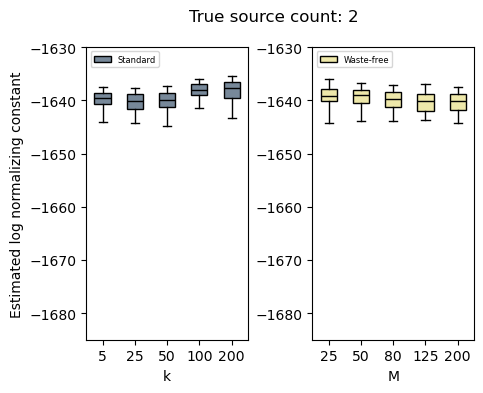

In [182]:
## PLOTS FOR SLIDES 

fig3a, [fig3aa, fig3ab] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig3aa.boxplot(setting1_std_log_normalizing_constant[0],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig3aa.set_xlabel('k')
fig3aa.set_ylabel('Estimated log normalizing constant')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig3aa.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig3ab.boxplot(setting1_wf_log_normalizing_constant[0], 
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig3ab.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig3ab.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
    
fig3aa.set_ylim(-1685, -1630)
fig3ab.set_ylim(-1685, -1630)

fig3a.suptitle("True source count: {}".format(2))


fig3a.savefig('../setting1_plots/setting1_fig3a.png', dpi = 400)

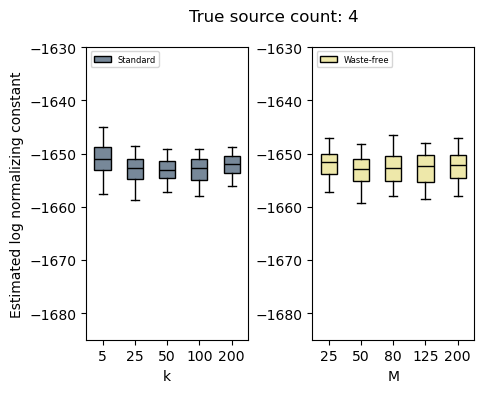

In [183]:
fig3b, [fig3ba, fig3bb] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig3ba.boxplot(setting1_std_log_normalizing_constant[1],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig3ba.set_xlabel('k')
fig3ba.set_ylabel('Estimated log normalizing constant')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig3ba.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig3bb.boxplot(setting1_wf_log_normalizing_constant[1], 
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig3bb.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig3bb.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
    
fig3ba.set_ylim(-1685, -1630)
fig3bb.set_ylim(-1685, -1630)

fig3b.suptitle("True source count: {}".format(4))


fig3b.savefig('../setting1_plots/setting1_fig3b.png', dpi = 400)

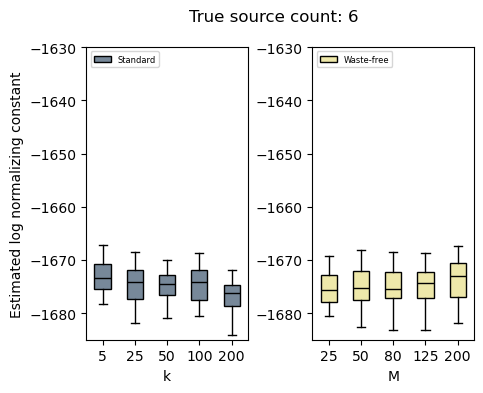

In [184]:
fig3c, [fig3ca, fig3cb] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig3ca.boxplot(setting1_std_log_normalizing_constant[2],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig3ca.set_xlabel('k')
fig3ca.set_ylabel('Estimated log normalizing constant')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig3ca.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig3cb.boxplot(setting1_wf_log_normalizing_constant[2], 
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig3cb.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig3cb.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
    
fig3ca.set_ylim(-1685, -1630)
fig3cb.set_ylim(-1685, -1630)

fig3c.suptitle("True source count: {}".format(6))


fig3c.savefig('../setting1_plots/setting1_fig3c.png', dpi = 400)

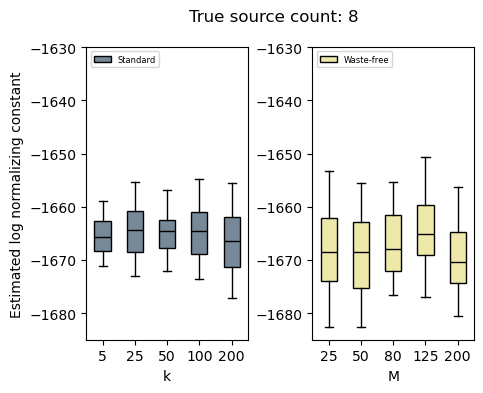

In [185]:
fig3d, [fig3da, fig3db] = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3.8))
plt.subplots_adjust( wspace=0.4, 
                    hspace=0.4)

bplot1 = fig3da.boxplot(setting1_std_log_normalizing_constant[3],
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters, showfliers=False)

fig3da.set_xlabel('k')
fig3da.set_ylabel('Estimated log normalizing constant')
for patch in bplot1['boxes']:
    patch.set_facecolor('lightslategray')
for median in bplot1['medians']:
            median.set_color('black')

#fig2aa.set_ylim(true_counts[i]-1, true_counts[i]+1)
    
fig3da.legend(bplot1["boxes"], ['Standard'], loc='upper left', fontsize = 6)

bplot2 = fig3db.boxplot(setting1_wf_log_normalizing_constant[3], 
                               whis=(5,95),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M, showfliers=False)
fig3db.set_xlabel('M')
for patch in bplot2['boxes']:
    patch.set_facecolor('palegoldenrod')
fig3db.legend(bplot2["boxes"], ['Waste-free'], loc='upper left', fontsize = 6)
for median in bplot2['medians']:
            median.set_color('black')
    
fig3da.set_ylim(-1685, -1630)
fig3db.set_ylim(-1685, -1630)

fig3d.suptitle("True source count: {}".format(8))


fig3d.savefig('../setting1_plots/setting1_fig3d.png', dpi = 400)